<a href="https://colab.research.google.com/github/anamika1302/ML_algo_from_scratch/blob/main/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to Create K-Mean clustering algorithm
#https://www.youtube.com/watch?v=vtuH4VRq1AU


*   Create input dataset using np.random.random((n_samples, n_size))
*   Define kmean class with following functions:
    - init(): to initialize no of iterations, no of clusters and cluster listof list
    - euclidean_distance(): np.sqrt(np.sum((X1-X2)**2))
    -  we don't need fit function as in clustering we don't have y-label
    - Predict():
        - initialize centroids with np.zeros(self.k, self,features)
        - then use np.random.choice(n,k) to randomly select k idx from samplesize
        - then update cluster:
            - create_cluster(centroids) - to create cluster for existing centroids
            - closest_centroids(sample, centroids): return the closest distance centroid idx using euclidean_distance()
            - centroid_old = self.centroid: save old centroid to check for convergence
            -get_new_centroids(cluster): get mean value for each X[cluster] value and assign to new centroids
            - is_converged(sentroid_old, centroid_new):
              check euclidean distance between each centroid point old and new and take summation and if it's 0, means the point has not changesd and model has converged.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

In [ ]:
X = np.random.random((10,2))
X

array([[0.96702984, 0.54723225],
       [0.97268436, 0.71481599],
       [0.69772882, 0.2160895 ],
       [0.97627445, 0.00623026],
       [0.25298236, 0.43479153],
       [0.77938292, 0.19768507],
       [0.86299324, 0.98340068],
       [0.16384224, 0.59733394],
       [0.0089861 , 0.38657128],
       [0.04416006, 0.95665297]])

In [ ]:
class Kmeans:

    def __init__(self, k =2, max_iters =100, plot_steps =False):
      self.k =k
      self.max_iters = max_iters
      self.clusters = [[] for _ in range(self.k)]
      self.centroids = []

    def euclidean_dist(self,x1,x2):
      return np.sqrt(np.sum((x1 - x2)**2))

    def closest_centroid(self, sample, centroids):
      distance = [self.euclidean_dist(sample,point) for point in centroids]
      closest_idx = np.argmin(distance)
      return closest_idx

    def create_clusters(self, centroids):
      clusters = [[] for _ in range(self.k)]
      for idx, sample in enumerate(self.X):
        centroid_idx = self.closest_centroid(sample, centroids)
        clusters[centroid_idx].append(idx)
      return clusters

    def get_new_centroids(self,clusters):
      centroids = np.zeros((self.k, self.n_features))
      for idx, cluster in enumerate(clusters):
        centroids[idx] = np.mean(self.X[cluster], axis = 0)
      return centroids

    def is_converged(self,centroids_old, centroid_new):
      dist = [self.euclidean_dist(centroids_old[i], centroid_new[i]) for i in range(self.k)]
      return sum(dist) == 0

    def get_cluster_labels(self,clusters):
      y_pred = [-1]*self.n_samples
      for idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
          y_pred[sample_idx] = idx
      return y_pred

    def plot(self):
      fig , ax = plt.subplots(figsize =(6,2))

      for i ,cluster_index in enumerate(self.clusters):
        point = self.X[cluster_index].T
        ax.scatter(*point,linewidth = 4)

      for point in self.centroids:
        ax.scatter(*point, marker = "x", color = "black" , linewidth = 2)

      plt.show()

    def predict(self, X):
      self.X = X
      self.n_samples, self.n_features = X.shape

      #initialise index randomly
      random_idx = np.random.choice(self.n_samples, self.k, replace =False)

      self.centroids = [self.X[idx] for idx in random_idx]
      print("X {}, centroids {}".format(self.X.shape,self.centroids))

      for _ in range(self.max_iters):

        # update cluster
        self.clusters = self.create_clusters(self.centroids)
        print("Plot Before")
        self.plot()
        # update  centroids
        centroids_old =self.centroids
        self.centroids = self.get_new_centroids(self.clusters)
        print("Plot After")
        self.plot()

        # check if converged
        if self.is_converged(centroids_old, self.centroids):
          break

      return self.get_cluster_labels(self.clusters)




X (10, 2), centroids [array([0.69772882, 0.2160895 ]), array([0.86299324, 0.98340068]), array([0.97268436, 0.71481599])]
Plot Before


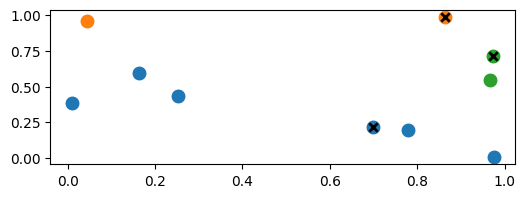

Plot After


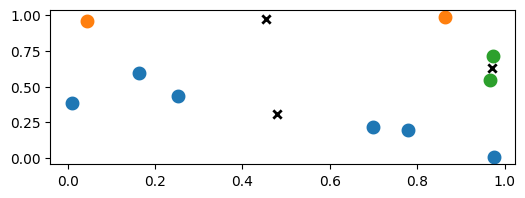

Plot Before


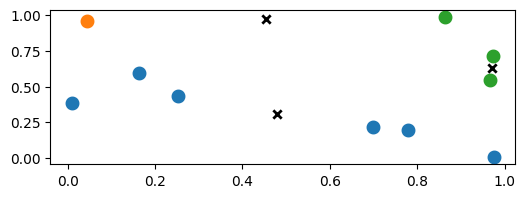

Plot After


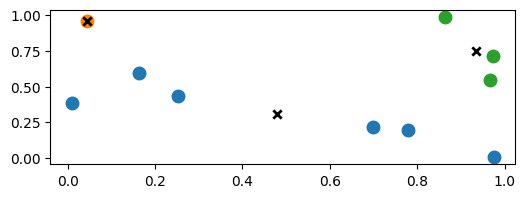

Plot Before


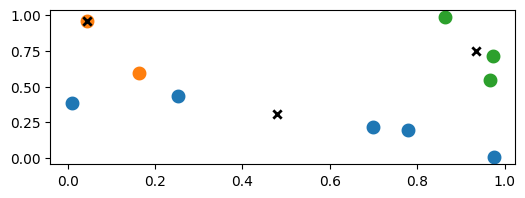

Plot After


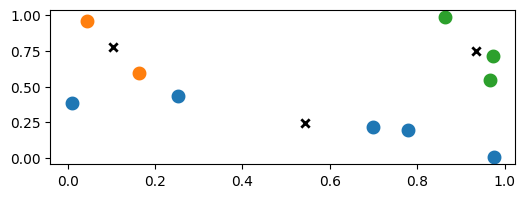

Plot Before


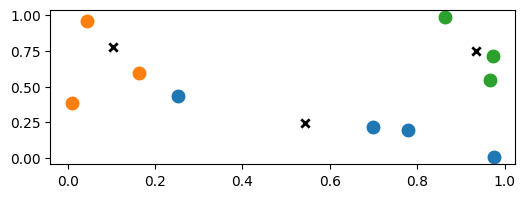

Plot After


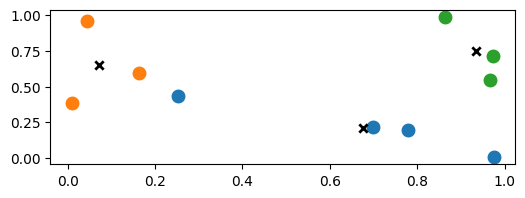

Plot Before


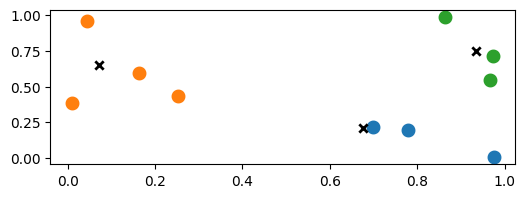

Plot After


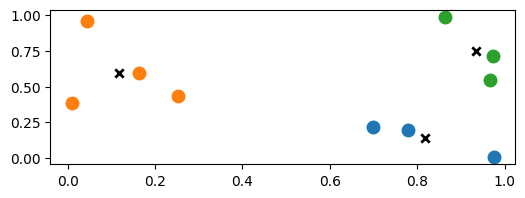

Plot Before


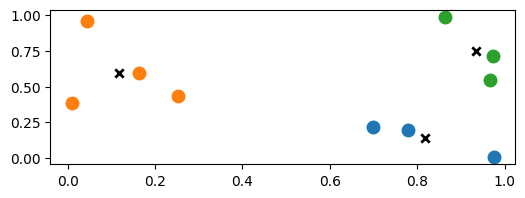

Plot After


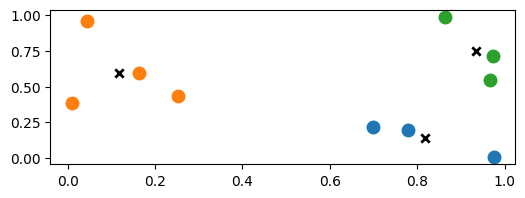

In [ ]:
Km = Kmeans(k =3)
y_pred = Km.predict(X)